<a href="https://colab.research.google.com/github/ak283/-Ambitionbox.com-web-scraping/blob/main/ambitionbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import requests as re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [12]:
#data= pd.DataFrame()
company=[]
sector=[]
employees=[]
duration =[]
location =[]
rating=[]
positive_rating=[]
negative_rating=[]

for i in range(1,101):
    url = "https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={}".format(i)
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    response=re.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav", headers= headers).text

    soup=BeautifulSoup(response, "lxml")


    for j in soup.find_all('h2', attrs={'class':"companyCardWrapper__companyName"}):
        #print(j.text.strip())
        company.append(j.text.strip())

    for j in soup.find_all('span', attrs={'class':"companyCardWrapper__companyRatingValue"}):
        #print(j.text.strip())
        rating.append(j.text.strip())

    a=[]
    for j in soup.find_all('span', attrs={'class':"companyCardWrapper__interLinking"}):
        #print(j.text.strip())
        a.append(j.text.strip())

    b=[]
    for i in range(len(a)):
        b.append(a[i].split('|'))
    #print(b)

    #sector=[]
    #employees=[]
    #duration =[]
    #location =[]
    for i in range(len(b)):
      sector.append(b[i][0])

      if len(b[i])==5:
          employees.append(b[i][1])
          duration.append(b[i][3])
          location.append(b[i][4])

      elif len(b[i])!=5:
          for j in range(len(b[i])):
              if 'Employees' in b[i][j]:
                  employees.append(b[i][j])
              if 'years' in b[i][j]:
                  duration.append(b[i][j])
              if 'more' in b[i][j]:
                  location.append(b[i][j])


    #positive_rating=[]
    #negative_rating=[]
    review= soup.find_all('div', attrs={'class':"companyCardWrapper__ratingComparisonWrapper"})

    for i in review:
      v=len(i.find_all('span'))

      if v==4:

        negative_rating.append(i.find_all('span')[3].text.strip())
        positive_rating.append(i.find_all('span')[1].text.strip())

      elif v==2:

        if i.find_all('span')[0].text.strip() == 'Highly Rated For':
          positive_rating.append(i.find_all('span')[1].text.strip())
          negative_rating.append('Nan')

        elif i.find_all('span')[0].text.strip()=='Critically Rated For' :
          negative_rating.append(i.find_all('span')[1].text.strip())
          positive_rating.append('Nan')


    #columns={'company':company, 'sector':sector, 'employees':employees, 'duration': duration, 'location': location,
     #        'Positive_rating':positive_rating, 'negative_rating':negative_rating}






In [15]:
columns={'company':company, 'sector':sector, 'employees':employees, 'duration': duration, 'location': location, 'rating':rating,
             'Positive_review':positive_rating, 'negative_review':negative_rating}

data = pd.DataFrame(columns)
    #df=pd.DataFrame(columns)
    #data=pd.concat([data, df], ignore_index=True)

In [16]:
data.sample(7)

,company,sector,employees,duration,location,rating,Positive_review,negative_review
397,Reliance Retail,Retail,1 Lakh+ Employees,18 years old,Navi Mumbai +1013 more,4.0,"Skill Development / Learning, Job Security",Promotions / Appraisal
970,Genpact,IT Services & Consulting,1 Lakh+ Employees,27 years old,New York +112 more,3.9,"Job Security, Skill Development / Learning, Wo...","Salary & Benefits, Promotions / Appraisal"
892,Teleperformance,BPO,50k-1 Lakh Employees,46 years old,Paris +192 more,3.7,Nan,"Promotions / Appraisal, Salary & Benefits"
1082,Cognizant,IT Services & Consulting,1 Lakh+ Employees,30 years old,Teaneck. New Jersey. +167 more,3.9,Skill Development / Learning,Promotions / Appraisal
1112,Teleperformance,BPO,50k-1 Lakh Employees,46 years old,Paris +192 more,3.7,Nan,"Promotions / Appraisal, Salary & Benefits"
1560,TCS,IT Services & Consulting,1 Lakh+ Employees,56 years old,Mumbai +349 more,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
36,IBM,IT Services & Consulting,1 Lakh+ Employees,113 years old,Armonk +148 more,4.1,"Work Life Balance, Job Security, Skill Develop...",Promotions / Appraisal


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          2000 non-null   object
 1   sector           2000 non-null   object
 2   employees        2000 non-null   object
 3   duration         2000 non-null   object
 4   location         2000 non-null   object
 5   rating           2000 non-null   object
 6   Positive_review  2000 non-null   object
 7   negative_review  2000 non-null   object
dtypes: object(8)
memory usage: 125.1+ KB


<Axes: xlabel='rating'>

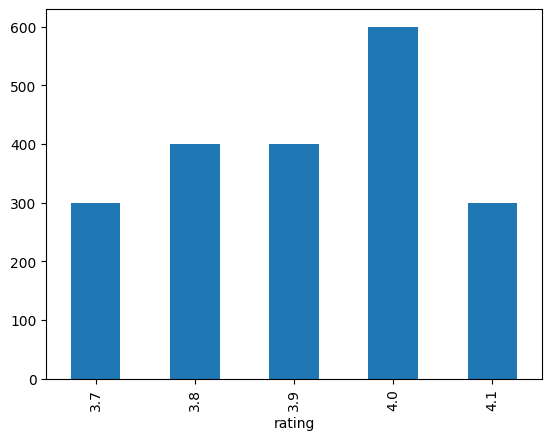

In [18]:
data['rating'] = data['rating'].astype(float)
data.groupby('rating')['company'].count().plot(kind='bar')


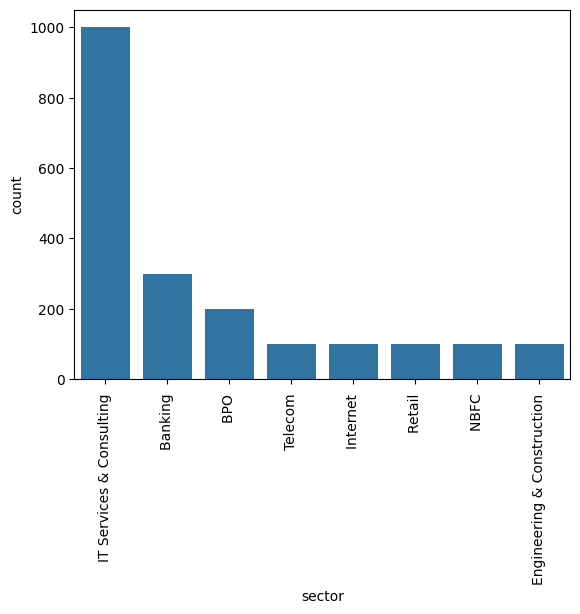

In [21]:
sns.countplot(data=data, x='sector');
plt.xticks(rotation=90);

In [22]:
data.to_csv("company_records.csv")